In [9]:
import pandas as pd
Data = pd.read_csv('CreditData.csv')
Data

,Status,Duration,history,Purpose,amount,Savings,employment,Installment,sex,guarantors,...,Property,Age,OtherInstallment,Housing,ExistingCredits,Job,liable,Telephone,foreign,Approved
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,Yes
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,No
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,Yes
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,Yes
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,Yes
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,Yes
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,Yes
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,No


In [10]:
Data.dtypes

Status              object
Duration             int64
history             object
Purpose             object
amount               int64
Savings             object
employment          object
Installment          int64
sex                 object
guarantors          object
residence            int64
Property            object
Age                  int64
OtherInstallment    object
Housing             object
ExistingCredits      int64
Job                 object
liable               int64
Telephone           object
foreign             object
Approved            object
dtype: object

In [11]:
#Convert Categorical Columns using Ordinal
print('uniue values of the target attribute (Approved):', Data.Approved.unique())
Data['Approved_val'] = Data['Approved']
Data['Approved_val'] = Data['Approved_val'].map({'Yes': 1, 'No': 0})
Data['foreign_val'] = Data['foreign']
Data['foreign_val'] = Data['foreign_val'].map({'A201': 1, 'A202': 0})
Data['Telephone_val'] = Data['Telephone']
Data['Telephone_val'] = Data['Telephone_val'].map({'A192': 1, 'A191': 0})
Data['Job_val'] = Data['Job']
Data['Job_val'] = Data['Job_val'].map({'A174': 3, 'A173': 2,'A172': 1,'A171': 0})
Data['Housing_val'] = Data['Housing']
Data['Housing_val'] = Data['Housing_val'].map({'A153': 2,'A152': 1,'A151': 0})
Data['Status_val'] = Data['Status']
Data['Status_val'] = Data['Status_val'].map({'A13': 3,'A12': 2,'A11': 1,'A14': 0})
Data['Savings_val'] = Data['Savings']
Data['Savings_val'] = Data['Savings_val'].map({'A64': 4,'A63': 3,'A62': 2,'A61': 1,'A65': 0})
Data['employment_val'] = Data['employment']
Data['employment_val'] = Data['employment_val'].map({'A75': 4,'A74': 3,'A73': 2,'A72': 1,'A71': 0})

uniue values of the target attribute (Approved): ['Yes' 'No']


In [12]:
#Convert Categorical Columns using OneHot
Data = pd.get_dummies(Data, columns=['history'])

In [13]:
Data = pd.get_dummies(Data, columns=['Purpose'])

In [14]:
Data = pd.get_dummies(Data, columns=['sex'])

In [15]:
Data = pd.get_dummies(Data, columns=['guarantors'])

In [16]:
Data = pd.get_dummies(Data, columns=['Property'])

In [17]:
Data = pd.get_dummies(Data, columns=['OtherInstallment'])

In [18]:
Data

,Status,Duration,amount,Savings,employment,Installment,residence,Age,Housing,ExistingCredits,...,guarantors_A101,guarantors_A102,guarantors_A103,Property_A121,Property_A122,Property_A123,Property_A124,OtherInstallment_A141,OtherInstallment_A142,OtherInstallment_A143
0,A11,6,1169,A65,A75,4,4,67,A152,2,...,1,0,0,1,0,0,0,0,0,1
1,A12,48,5951,A61,A73,2,2,22,A152,1,...,1,0,0,1,0,0,0,0,0,1
2,A14,12,2096,A61,A74,2,3,49,A152,1,...,1,0,0,1,0,0,0,0,0,1
3,A11,42,7882,A61,A74,2,4,45,A153,1,...,0,0,1,0,1,0,0,0,0,1
4,A11,24,4870,A61,A73,3,4,53,A153,2,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,1736,A61,A74,3,4,31,A152,1,...,1,0,0,1,0,0,0,0,0,1
996,A11,30,3857,A61,A73,4,4,40,A152,1,...,1,0,0,0,1,0,0,0,0,1
997,A14,12,804,A61,A75,4,4,38,A152,1,...,1,0,0,0,0,1,0,0,0,1
998,A11,45,1845,A61,A73,4,4,23,A153,1,...,1,0,0,0,0,0,1,0,0,1


In [19]:
Data.dtypes

Status                   object
Duration                  int64
amount                    int64
Savings                  object
employment               object
Installment               int64
residence                 int64
Age                       int64
Housing                  object
ExistingCredits           int64
Job                      object
liable                    int64
Telephone                object
foreign                  object
Approved                 object
Approved_val              int64
foreign_val               int64
Telephone_val             int64
Job_val                   int64
Housing_val               int64
Status_val                int64
Savings_val               int64
employment_val            int64
history_A30               uint8
history_A31               uint8
history_A32               uint8
history_A33               uint8
history_A34               uint8
Purpose_A40               uint8
Purpose_A41               uint8
Purpose_A410              uint8
Purpose_

In [20]:
#Split data into Test and Train
from sklearn.model_selection import train_test_split

all_y = Data['Approved_val']
all_X = Data[['Duration', 'amount', 'Installment','residence', 'Age','ExistingCredits', 'liable','foreign_val', 'Savings_val', 'employment_val', 'Telephone_val', 'Job_val','Housing_val', 'Status_val',
               'history_A30','history_A31', 'history_A32', 'history_A33', 'history_A34',
               'Purpose_A40', 'Purpose_A41', 'Purpose_A410', 'Purpose_A42','Purpose_A43', 'Purpose_A44', 'Purpose_A45', 'Purpose_A46','Purpose_A48', 'Purpose_A49',
               'sex_A91', 'sex_A92', 'sex_A93', 'sex_A94',
               'Property_A121', 'Property_A122', 'Property_A123', 'Property_A124',
              'OtherInstallment_A141','OtherInstallment_A142', 'OtherInstallment_A143']]

# 80% training set and 20% test set
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y , test_size=0.2, random_state=42)

print('length of train:', len(train_X))
print('length of test:', len(test_X))

length of train: 800
length of test: 200


In [21]:
from sklearn import tree
tree1 = tree.DecisionTreeClassifier()
tree1.fit(train_X, train_y)

DecisionTreeClassifier()

In [22]:
Predictions = tree1.predict(test_X)

from sklearn.metrics import accuracy_score
print(accuracy_score(test_y, Predictions))

0.72


[Text(0.46624755859375, 0.9814814814814815, 'x[13] <= 0.5\ngini = 0.421\nsamples = 800\nvalue = [241, 559]'),
 Text(0.19163602941176472, 0.9444444444444444, 'x[39] <= 0.5\ngini = 0.231\nsamples = 323\nvalue = [43, 280]'),
 Text(0.09558823529411764, 0.9074074074074074, 'x[9] <= 2.5\ngini = 0.44\nsamples = 55\nvalue = [18, 37]'),
 Text(0.0625, 0.8703703703703703, 'x[28] <= 0.5\ngini = 0.499\nsamples = 27\nvalue = [13, 14]'),
 Text(0.04411764705882353, 0.8333333333333334, 'x[0] <= 29.0\ngini = 0.455\nsamples = 20\nvalue = [7, 13]'),
 Text(0.029411764705882353, 0.7962962962962963, 'x[14] <= 0.5\ngini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.022058823529411766, 0.7592592592592593, 'x[12] <= 0.5\ngini = 0.153\nsamples = 12\nvalue = [1, 11]'),
 Text(0.014705882352941176, 0.7222222222222222, 'x[3] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.007352941176470588, 0.6851851851851852, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.022058823529411766, 0.6851851851851852, 

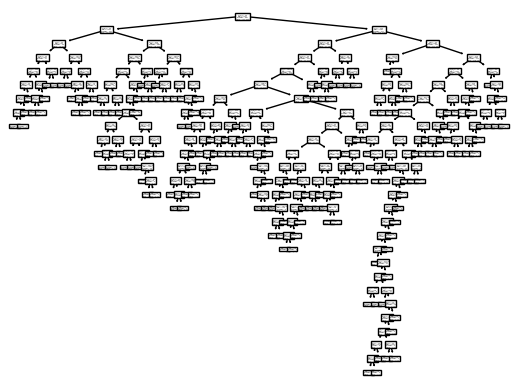

In [23]:
tree.plot_tree(tree1)

In [24]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [25]:
#Building Confusion Matrix
conf_matrix = confusion_matrix(Predictions, test_y, labels=[1, 0])
True_Positive = conf_matrix[0, 0]
False_Positive = conf_matrix[0, 1]
False_Negative = conf_matrix[1, 0]
True_Negative = conf_matrix[1, 1]
print("True_Positive:", True_Positive, "False_Positive:", False_Positive, "False_Negative:", False_Negative, "True_Negative", True_Negative)

True_Positive: 115 False_Positive: 30 False_Negative: 26 True_Negative 29


In [26]:
print('Precision Score: %.3f' % precision_score(test_y, Predictions))

Precision Score: 0.793


In [27]:
print('Recall Score: %.3f' % recall_score(test_y, Predictions))

Recall Score: 0.816


In [28]:
print('Accuracy Score: %.3f' % accuracy_score(test_y, Predictions))

Accuracy Score: 0.720
